In [23]:
import pandas as pd
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import movingpandas as mpd
mpd.show_versions()

from datetime import datetime

import warnings
warnings.simplefilter("ignore")


MovingPandas 0.17.1

SYSTEM INFO
-----------
python     : 3.8.10 (default, Jun 22 2022, 20:18:18)  [GCC 9.4.0]
executable : /usr/bin/python3
machine    : Linux-5.15.0-87-generic-x86_64-with-glibc2.29

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.6.4
GDAL data dir: /usr/local/lib/python3.8/dist-packages/fiona/gdal_data
PROJ       : 9.2.0
PROJ data dir: /usr/local/lib/python3.8/dist-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.13.2
pandas     : 1.5.3
fiona      : 1.9.5
numpy      : 1.24.1
shapely    : 2.0.2
rtree      : 1.1.0
pyproj     : 3.5.0
matplotlib : 3.6.3
mapclassify: None
geopy      : 2.4.0
holoviews  : 1.17.1
hvplot     : 0.9.0
geoviews   : 1.10.1
stonesoup  : None


In [24]:
# domain A piA csv path
DA_piA_csv = 'data/DomainA_240/piA/piA_240_ep'
DA_piA_pth = [DA_piA_csv+str(i) for i in range(1, 11)]

for i in range(1, 11):
    df = pd.read_csv(DA_piA_pth[i-1]+'.csv')
    traj_id = [i]*len(df)
    df['trajectory_id'] = traj_id
    df.to_csv(DA_piA_pth[i-1]+'.csv', index=False)

# domain A piAC csv path
DA_piAC_csv = 'data/DomainA_240/piAC/piAC_240_ep'
DA_piAC_pth = [DA_piAC_csv+str(i) for i in range(1, 11)]

for i in range(11, 21):
    df = pd.read_csv(DA_piAC_pth[i-11]+'.csv')
    traj_id = [i]*len(df)
    df['trajectory_id'] = traj_id
    df.to_csv(DA_piAC_pth[i-11]+'.csv', index=False)


# domain C pi AC csv path
DC_piAC_csv = 'data/piAC_cave_DomainC_90degree/cave_curriculum90_'
DC_piAC_pth = [DC_piAC_csv+str(i) for i in range(1, 11)]

for i in range(21, 31):
    df = pd.read_csv(DC_piAC_pth[i-21]+'.csv')
    traj_id = [i]*len(df)
    df['trajectory_id'] = traj_id
    df.to_csv(DC_piAC_pth[i-21]+'.csv', index=False)

In [25]:
def calculate_spl(pth):
    df = pd.read_csv(pth+'.csv' , delimiter=',')

    time_list = []
    for i in df['t']:
        time_list.append(datetime.fromtimestamp(i).strftime("%A, %B %d, %Y %I:%M:%S.%f"))

    df['t'] = time_list

    point_list = []
    for x,y in zip(df['X'],df['Y']):
        point_list.append(Point(x,y))

    geo_df = pd.DataFrame(columns=['geometry', 't'])
    geo_df['geometry'] = point_list
    geo_df['t'] = time_list
    geo_df['trajectory_id'] = df['trajectory_id']
    geo_df = GeoDataFrame(geo_df, crs=31256)

    traj_df = mpd.Trajectory(geo_df, 1, t='t')
    traj_df.add_direction(overwrite=True)
    traj_df.add_speed(overwrite=True)
    traj_df.add_angular_difference(overwrite=True)

#     print("length", traj_df.get_length())
    return traj_df.get_length()

In [26]:
df_astar = pd.read_csv('data/astar_mike.csv' , delimiter=',')

id_list = []
time_list = []
for i in df_astar['t']:
    time_list.append(datetime.fromtimestamp(i).strftime("%A, %B %d, %Y %I:%M:%S.%f"))
    id_list.append(1)
df_astar['t'] = time_list

point_list = []
for x,y in zip(df_astar['X'],df_astar['Y']):
    point_list.append(Point(x,y))

geo_astar = pd.DataFrame(columns=['geometry', 't'])
geo_astar['geometry'] = point_list
geo_astar['t'] = time_list
geo_astar['trajectory_id'] = id_list
geo_astar = GeoDataFrame(geo_astar, crs=31256)

traj_astar = mpd.Trajectory(geo_astar, 1, t='t')
traj_astar.add_direction(overwrite=True)
traj_astar.add_speed(overwrite=True)
traj_astar.add_angular_difference(overwrite=True)

print("length", traj_astar.get_length())
# traj_astar.plot(column='trajectory_id', legend=True, color='red')

length 23.757969226052708


In [27]:
df_astar = pd.read_csv('data/astar_juile.csv' , delimiter=',')

id_list = []
time_list = []
for i in df_astar['t']:
    time_list.append(datetime.fromtimestamp(i).strftime("%A, %B %d, %Y %I:%M:%S.%f"))
    id_list.append(2)
df_astar['t'] = time_list

point_list = []
for x,y in zip(df_astar['X'],df_astar['Y']):
    point_list.append(Point(x,y))

geo_astar_2 = pd.DataFrame(columns=['geometry', 't'])
geo_astar_2['geometry'] = point_list
geo_astar_2['t'] = time_list
geo_astar_2['trajectory_id'] = id_list
geo_astar_2 = GeoDataFrame(geo_astar_2, crs=31256)

traj_astar = mpd.Trajectory(geo_astar_2, 1, t='t')
traj_astar.add_direction(overwrite=True)
traj_astar.add_speed(overwrite=True)
traj_astar.add_angular_difference(overwrite=True)


print("length", traj_astar.get_length())
# traj_astar.plot(column='trajectory_id', legend=True, color='red')

length 23.749966886193654


In [28]:
spl_DA_piA = []
spl_DA_piAC = []
spl_DC_piA = [0]*10
spl_DC_piAC = []

for i in range(10):
    spl = calculate_spl(DA_piA_pth[i])
    spl_DA_piA.append(spl)
    spl = calculate_spl(DA_piAC_pth[i])
    spl_DA_piAC.append(spl)
    spl = calculate_spl(DC_piAC_pth[i])
    spl_DC_piAC.append(spl)

print(spl_DA_piA)
print(spl_DA_piAC)
print(spl_DC_piA)
print(spl_DC_piAC)

[26.904486283537658, 26.9994271270156, 26.980986414482903, 26.071662745415555, 26.90224838080957, 26.917821996627858, 26.94056797973722, 26.737309501582935, 26.937028678203752, 26.944415000725755]
[25.741950955725777, 25.971870463514687, 25.88010170978857, 25.76251449621285, 25.822799839012063, 25.668001868524662, 25.76983387353381, 25.905742221953535, 25.63226553578137, 25.8944390395735]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[26.199345937059046, 28.732895183821576, 26.027871661091385, 27.62959343764854, 25.872832084843544, 29.083215519781508, 27.54968411316355, 28.359545542209393, 27.589863706139095, 27.633685912919365]


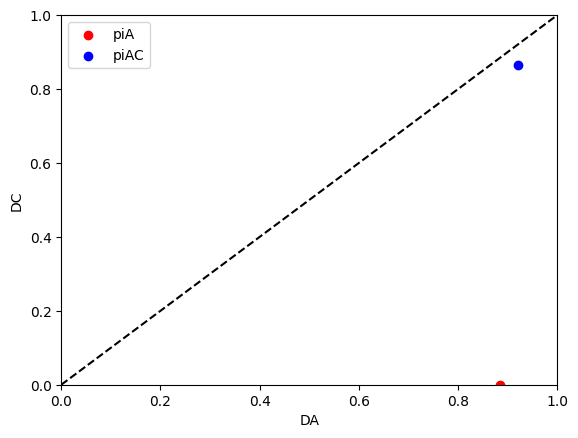

In [34]:
# plot the fig
plt.figure()

plt.scatter(23.749966886193654/np.mean(spl_DA_piA), np.mean(spl_DC_piA), color='red', marker='o', label='piA')
plt.scatter(23.749966886193654/np.mean(spl_DA_piAC), 23.749966886193654/np.mean(spl_DC_piAC), color='blue', marker='o', label='piAC')

plt.plot([0,1], [0,1], 'k--')

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel('DA')
plt.ylabel('DC')

plt.legend()
plt.show()